In [3]:
import numpy as np

In [4]:
import pandas as pd
tweets_coronavirus = pd.read_csv('covid19_tweets.csv')

In [5]:
# Displaying the dataset
tweets_coronavirus.head()
tweets_coronavirus.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False
179107,TUKY II,"Aliwal North, South Africa",TOKELO SEKHOPA | TUKY II | LAST BORN | EISH TU...,2018-04-14 17:30:07,97,1697,566,False,2020-08-29 19:44:08,I stop when I see a Stop\n\n@SABCNews\n@Izinda...,NaN,Twitter for Android,False


In [6]:
# Checking the structure of the dataset
tweets_coronavirus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [7]:
# Checking the size of the dataset
tweets_coronavirus.shape

(179108, 13)

In [8]:
# Checking the missing value
tweets_coronavirus.isnull().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

In [9]:
# Selecting the fetaures 
selected_feature = tweets_coronavirus.loc[:,['date','text']]
# Displaying the selected features
print(selected_feature.head())

                  date                                               text
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...


In [181]:
# Data pre-processing 
# Seperate the tweets into words 

from nltk.tokenize import  word_tokenize
word_dataset = []    
for w in selected_feature['text']:
    word_dataset.append(word_tokenize(w.lower())) # Lowering all the cases    
    
print(word_dataset[:2])


[['if', 'i', 'smelled', 'the', 'scent', 'of', 'hand', 'sanitizers', 'today', 'on', 'someone', 'in', 'the', 'past', ',', 'i', 'would', 'think', 'they', 'were', 'so', 'intoxicated', 'that…', 'https', ':', '//t.co/qzvybrogb0'], ['hey', '@', 'yankees', '@', 'yankeespr', 'and', '@', 'mlb', '-', 'would', "n't", 'it', 'have', 'made', 'more', 'sense', 'to', 'have', 'the', 'players', 'pay', 'their', 'respects', 'to', 'the', 'a…', 'https', ':', '//t.co/1qvw0zgypu']]


In [182]:
import nltk
from itertools import chain
flat_word_list = list(chain.from_iterable(word_dataset))
pre_processed_data = nltk.FreqDist(flat_word_list)
# Most common data 
print(pre_processed_data.most_common(10))

[('#', 266985), (':', 208423), ('https', 177119), ('the', 103582), ('covid19', 97144), ('@', 85902), (',', 80194), ('.', 75089), ('to', 73452), ('of', 58512)]


In [12]:
# Removing stopping word 
# Importing the stopping dataset 
from nltk.corpus import stopwords

# Creating the stop word dataset
stop_words = set(stopwords.words('english'))
# Decreasing the dataset becuase due to lack of computational power
decreased_datasize = word_dataset[:5000] 
# Storage the dataset after removing removing stopping words  
removed_stop_words = []
for w_list in decreased_datasize:
        cleaned_sentence = [
            w for w in w_list
            if w not in stop_words and w not in ('...', 'https', ':', '@','#', '-', ',','.', '●', '!', '``','”',')','(') 
            and not w.startswith(( 'https', '//', '🇺🇸', '🔊', '📍','🤢','👋🏻',',','’', "'"))
        ]   
        removed_stop_words.append(cleaned_sentence)
        
print(removed_stop_words[:2])

[['smelled', 'scent', 'hand', 'sanitizers', 'today', 'someone', 'past', 'would', 'think', 'intoxicated', 'that…'], ['hey', 'yankees', 'yankeespr', 'mlb', 'would', "n't", 'made', 'sense', 'players', 'pay', 'respects', 'a…']]


In [13]:
# Lemmatization : reducing word to root form 
# Removing 'ing', 'ed', ''s' etc
# Importing the package 
from nltk.stem import WordNetLemmatizer
# Defing the scaler
lemmatizer_scaler = WordNetLemmatizer()
converted_dataset = []
for w_list in removed_stop_words:
    changed_sentance = [
        lemmatizer_scaler.lemmatize(w, pos="v") for w in w_list
        
    ]
    converted_dataset.append(changed_sentance)
print(converted_dataset[:2])

[['smell', 'scent', 'hand', 'sanitizers', 'today', 'someone', 'past', 'would', 'think', 'intoxicate', 'that…'], ['hey', 'yankees', 'yankeespr', 'mlb', 'would', "n't", 'make', 'sense', 'players', 'pay', 'respect', 'a…']]


In [14]:
# Joining the word to make sentance for sentimental analysis 
# storage for pre-processed tweets 
pre_process_tweet = []

for w in converted_dataset:
    whole_sentance = ' '.join(w)
    pre_process_tweet.append(whole_sentance )
print(pre_process_tweet[:3])

['smell scent hand sanitizers today someone past would think intoxicate that…', "hey yankees yankeespr mlb would n't make sense players pay respect a…", 'diane3443 wdunlap realdonaldtrump trump never claim covid19 hoax claim effort to…']


In [73]:
from nltk.sentiment import SentimentIntensityAnalyzer
# Initialing the sentiment_score
sentiment_score = []
# Defing the scaler 
scaler = SentimentIntensityAnalyzer()
for score in pre_process_tweet:
    sentiment_scores = scaler.polarity_scores(score)
    sentiment_score.append(sentiment_scores)
# Converting into dataframe 
sentiment_score_df = pd.DataFrame(sentiment_score)
print(sentiment_score_df)

        neg    neu    pos  compound
0     0.000  0.758  0.242    0.4939
1     0.097  0.690  0.214    0.4019
2     0.000  0.846  0.154    0.2057
3     0.000  0.592  0.408    0.7351
4     0.000  0.813  0.187    0.3182
...     ...    ...    ...       ...
4995  0.000  1.000  0.000    0.0000
4996  0.275  0.523  0.203   -0.0258
4997  0.280  0.720  0.000   -0.5423
4998  0.343  0.657  0.000   -0.6908
4999  0.301  0.515  0.184   -0.3818

[5000 rows x 4 columns]


In [155]:
# Defining the limited data of tweets and date
limited_feature = selected_feature.loc[:,['date','text']][:5000]
# Merging the sentimental score with the date and tweets
merged_df = limited_feature.merge(sentiment_score_df, left_index=True, right_index=True)
# Displaying the shape after mergining 
print(merged_df.shape)

(5000, 6)


In [156]:
# Displaying the sentiment score of each tweets
merged_df.head()

,date,text,neg,neu,pos,compound
0,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,0.000,0.758,0.242,0.4939
1,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,0.097,0.690,0.214,0.4019
2,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,0.000,0.846,0.154,0.2057
3,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,0.000,0.592,0.408,0.7351
4,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,0.000,0.813,0.187,0.3182


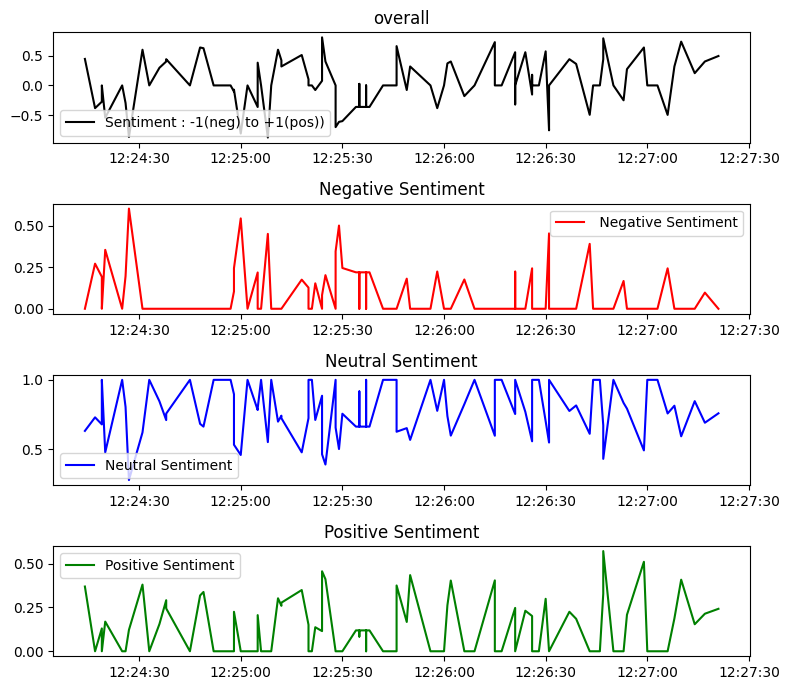

In [180]:
# Ploting the bar chart
import matplotlib.pyplot as plt

# Setting the limit 
subset_df = merged_df.head(100)

# Ensure 'date' is a datetime object
date = pd.to_datetime(subset_df['date'])

# Extracting individual values 
neg = subset_df['neg']
neu = subset_df['neu']
pos = subset_df['pos']
compound = subset_df['compound']

# Allocating the grid size 
plt.figure(figsize = (8,7))

plt.subplot(4,1,1)
plt.plot(date,compound, color = 'black', label = 'Sentiment : -1(neg) to +1(pos))')
plt.title("overall")
plt.legend()

plt.subplot(4,1,2)
plt.plot(date,neg, color = 'red', label = ' Negative Sentiment')
plt.title("Negative Sentiment")
plt.legend()

plt.subplot(4,1,3)
plt.plot(date,neu, color = 'blue', label = 'Neutral Sentiment')
plt.title("Neutral Sentiment")
plt.legend()

plt.subplot(4,1,4)
plt.plot(date,pos, color = 'green', label = 'Positive Sentiment')
plt.title("Positive Sentiment")
plt.legend()

# Adjusts layout to prevent clipping of labels
plt.tight_layout()  
# Displaying the plot
plt.show()

